In [1]:
import numpy as np
import scipy as sp
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

warnings.filterwarnings(action='ignore')

from plotting_utilities import *

In [2]:
# array of years
years = np.arange(1983,2008)

# create list of file names
file_years = file_concatenator(years)

# creating cape array from different files and treating for negatives
cape_array = nc_open_compile(file_years,"cape")
cape = negative_to_nan(cape_array)

# applying same for pmax
pmax_array = nc_open_compile(file_years,"pmax")
pmax = negative_to_nan(pmax_array)

In [3]:
# extract pressure from the data files
# water vapour levels opened and vstacked, negatives removed
qv_array = nc_open_compile( file_years, "qvpre", 'stack' )
qv = negative_to_nan(qv_array) # not sure if this needed????

#pressure level values converted into double point precision
plev = np.double((xr.open_dataset(file_years[0])).pressure.data)

#integral computed using trapezoidal integration
integral = np.trapz(x=(np.array(plev))*100,y=qv)

#cwvc calculated 
cwvc = (1/(rho*g))*integral*1000

# bin_stat_function called from plotting_utilities and assigned to cwvc values and associated precipitation
cwvc_bins, pmax_bins_2, pmax_95_bins_2, pmax_99_bins_2, cwvc_error, pmax_error_2, cwvc_max, p_max_2 = \
    bin_stat_function( 35, 5, 65, cwvc, pmax, threshold=10 )

## Figure 1 - Nonlinear Moisture-Precip Relationship for MCS across Percentiles (ERA-I)

Figure(1000x800)


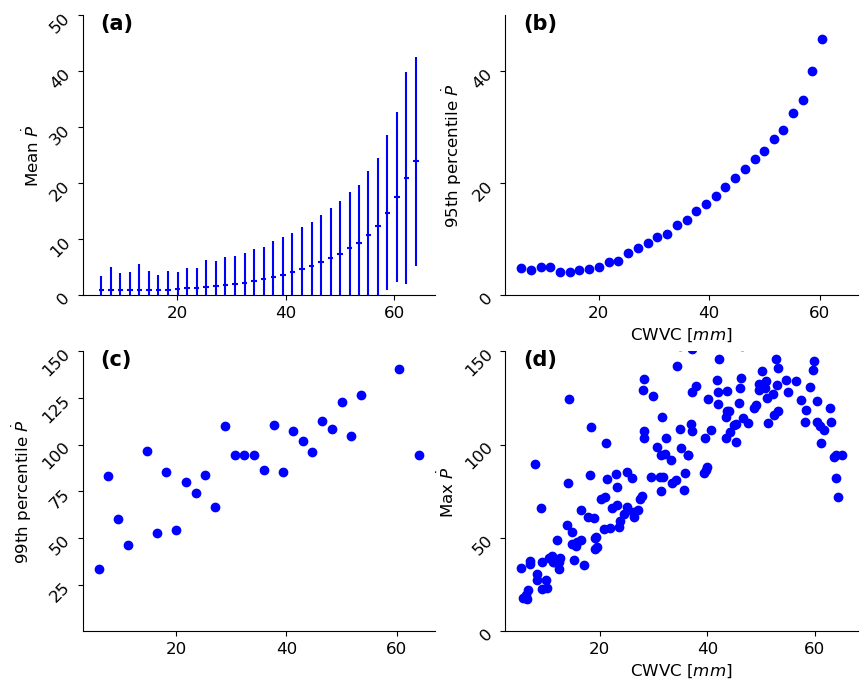

In [4]:
# first entry is the title and has been removed
precip_cwvc_labels = [ '', ['CWVC','mm'], ['Precipitation intensity','mm h^{-1}'] ]
precip_bin_arrays_2 = [ pmax_bins_2, pmax_95_bins_2, pmax_99_bins_2, p_max_2 ]
fig = mean_pc_max_plot( [cwvc_bins,cwvc_max], precip_bin_arrays_2, [cwvc_error,pmax_error_2], precip_cwvc_labels, )
print(fig)

fig.savefig( '/xdisk/sylvia/RCE-CAPE-exploration/figures/cwvc-precip-ERAI.pdf', bbox_inches='tight' )
#plt.show()